In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
print(tf.__version__)

2.7.0


In [3]:
gpus = tf.config.list_physical_devices('GPU')
gpus

2022-06-20 11:15:42.333379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:15:42.402745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:15:42.403316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


2022-06-20 11:16:14.883727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:16:14.884512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:16:14.885271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:16:15.852589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:16:15.852914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

In [5]:
fashion_mnist=keras.datasets.mnist

In [10]:
(trainImages,trainLabels),(testImages,testLabels)=fashion_mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [7]:
import matplotlib.pyplot as plt

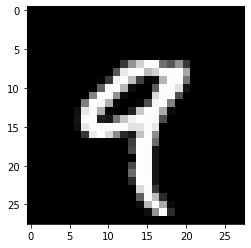

In [12]:
plt.imshow(trainImages[4],cmap='gray')

In [13]:
trainImages[0].shape

(28, 28)

In [14]:
trainImages=trainImages.reshape(len(trainImages),28,28,1)
testImages=testImages.reshape(len(testImages),28,28,1)

In [17]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 14.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [19]:
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [20]:
def buildmodel(hp):
    model=keras.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Int("filterConv",min_value=32,max_value=128,step=16),
    kernel_size=hp.Choice('kernel_conv',values=[3,5]),
    activation='relu',input_shape=(28,28,1)))
    model.add(keras.layers.Conv2D(filters=hp.Int('conFilter',min_value=32,max_value=128,step=16),
                                kernel_size=hp.Choice('kernel_conv',values=[3,5]),activation='relu'))
    model.add(keras.layers.Conv2D(filters=hp.Int('conFilter',min_value=32,max_value=128,step=16),
                                  kernel_size=hp.Choice('kernel_conv',values=[3,5]),activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int('denseFilter',min_value=32,max_value=128,step=16),activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))
    optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3]))
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [21]:
tuner_search=RandomSearch(buildmodel,objective='val_accuracy',max_trials=5,directory='output',project_name='mnistFashion')

In [22]:
tuner_search.search(trainImages,trainLabels,epochs=5,validation_split=0.1)

Trial 5 Complete [00h 03m 24s]
val_accuracy: 0.9614999890327454

Best val_accuracy So Far: 0.9861666560173035
Total elapsed time: 00h 12m 08s
INFO:tensorflow:Oracle triggered exit


In [23]:
model=tuner_search.get_best_models(num_models=1)[0]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 48)                1486896   
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,561,882
Trainable params: 1,561,882
Non-

In [25]:
model.fit(trainImages, trainLabels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0551 - val_accuracy: 0.9832
Epoch 5/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0755 - val_accuracy: 0.9832
Epoch 6/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0589 - val_accuracy: 0.9862
Epoch 7/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0589 - val_accuracy: 0.9858
Epoch 8/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0749 - val_accuracy: 0.9858
Epoch 9/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.0797 - val_accuracy: 0.9858
Epoch 10/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0854 -